In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle

In [162]:
df_Fpros_2022 = pd.read_csv('2022_FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR.csv')
df_Fpros_2021 = pd.read_csv('2021_FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR.csv')
df_PFR_2022 = pd.read_csv('2022_WR_PFR.txt',usecols=['Player', 'TD', 'ADOT', '1D', 'Rat'])
df_PFR_2021 = pd.read_csv('2021_WR_PFR.txt',usecols=['Player', 'TD', 'ADOT', '1D', 'Rat'])
df_Espn_2022 = pd.read_csv('ESPN WR STATS  - 2022 ESPN.csv', usecols=['Player','Routes', 'YDS/RT', 'Open_Score', 'Catch_Score', 'Yac_Score', 'Overall_Score'])
df_Espn_2021 = pd.read_csv('ESPN WR STATS  - 2021 ESPN.csv', usecols=['Player','Routes', 'YDS/RT', 'Open_Score', 'Catch_Score', 'Yac_Score', 'Overall_Score'])

In [181]:
# Remove the team information from player names
df_Fpros_2022['Player'] = df_Fpros_2022['Player'].str.replace(r'\s*\([^()]*\)', '', regex=True)
df_Fpros_2021['Player'] = df_Fpros_2021['Player'].str.replace(r'\s*\([^()]*\)', '', regex=True)

#Remove columns
columns_to_drop = ['Rank', 'LNG']
df_Fpros_2022_clean = df_Fpros_2022.drop(columns=columns_to_drop)
df_Fpros_2021_clean = df_Fpros_2021.drop(columns=columns_to_drop)
#df_Fpros_2021_clean.head()
#df_Fpros_2022_Train.describe().T
df_Fpros_2021_clean.head()

,Player,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,YAC,...,TGT,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
0,Justin Jefferson,17.0,145.0,"1,947",13.4,"1,101",7.6,"1,101",7.6,846.0,...,191.0,31.7%,156.0,8.0,37.0,66.0,30.0,15.0,9.0,3.0
1,Davante Adams,16.0,77.0,"1,405",18.9,621,8.0,621,8.0,855.0,...,121.0,24.2%,89.0,10.0,9.0,52.0,24.0,13.0,10.0,6.0
2,Tyreek Hill,17.0,81.0,"1,455",18.0,804,9.9,804,9.9,651.0,...,128.0,23.7%,95.0,11.0,12.0,51.0,22.0,13.0,8.0,6.0
3,A.J. Brown,17.0,108.0,"1,616",14.9,"1,141",10.5,"1,141",10.5,482.0,...,167.0,28.9%,120.0,7.0,20.0,67.0,27.0,11.0,5.0,2.0
4,Stefon Diggs,16.0,123.0,"1,553",12.6,961,7.8,961,7.8,592.0,...,169.0,29.6%,127.0,4.0,27.0,66.0,19.0,12.0,4.0,2.0


In [183]:
#df_PFR_2021.head()
#df_PFR_2021.describe().T
#print(df_PFR_2021.columns)

,Player,TD,1D,ADOT,Rat
0,Cooper Kupp,16,89.0,8.6,124.8
1,Davante Adams,11,84.0,9.6,115.3
2,Tyreek Hill,9,75.0,10.4,103.7
3,Justin Jefferson,10,75.0,12.4,111.3
4,Mark Andrews,9,75.0,10.3,92.5


In [185]:
df_Espn_2022.head()
#df_Espn_2021.describe().T

,Player,Routes,YDS/RT,Open_Score,Catch_Score,Yac_Score,Overall_Score
0,A.J. Brown,592,2.8,92,61,62,88
1,Justin Jefferson,667,2.8,81,81,50,85
2,Tyler Lockett,542,2.0,95,79,29,84
3,Stefon Diggs,619,2.5,83,81,43,83
4,Diontae Johnson,581,1.5,99,56,43,81


In [187]:
#Merge all 3 dfs into 1 for each year
merged_df_2022 = pd.merge(df_Espn_2022, df_Fpros_2022_clean, on='Player', how='inner').merge(df_Fpros_2022_clean, on='Player', how='inner').merge(df_PFR_2022, on='Player', how='inner')
merged_df_2021 = pd.merge(df_Espn_2021, df_Fpros_2021_clean, on='Player', how='inner').merge(df_Fpros_2021_clean, on='Player', how='inner').merge(df_PFR_2021, on='Player', how='inner')


#merged_df_2022.to_csv('merged_data_2022_updated.csv', index=False)
#merged_df_2021.to_csv('merged_data_2021_updated.csv', index=False)

#Adding new column to df to count year
merged_df_clean_2022 = pd.read_csv('merged_data_2022_updated.csv')
merged_df_clean_2021 = pd.read_csv('merged_data_2021_updated.csv')
merged_df_clean_2022['Year'] = 2022
merged_df_clean_2021['Year'] = 2021
merged_df_clean_2022.head()


,Player,Routes,YDS/RT,Open_Score,Catch_Score,Yac_Score,Overall_Score,G_x,REC_x,YDS_x,...,10+ YDS_y,20+ YDS_y,30+ YDS_y,40+ YDS_y,50+ YDS_y,TD,1D,ADOT,Rat,Year
0,A.J. Brown,592,2.8,92,61,62,88,17.0,88.0,"1,496",...,58.0,23.0,13.0,6.0,3.0,11,59.0,12.1,112.3,2022
1,Justin Jefferson,667,2.8,81,81,50,85,17.0,128.0,"1,809",...,74.0,28.0,14.0,6.0,1.0,8,80.0,10.1,104.2,2022
2,Tyler Lockett,542,2.0,95,79,29,84,16.0,84.0,"1,033",...,42.0,14.0,8.0,1.0,0.0,9,50.0,10.6,106.5,2022
3,Stefon Diggs,619,2.5,83,81,43,83,17.0,110.0,"1,455",...,57.0,17.0,10.0,6.0,2.0,11,74.0,11.2,120.3,2022
4,Diontae Johnson,581,1.5,99,56,43,81,17.0,86.0,882,...,38.0,7.0,3.0,0.0,0.0,0,45.0,10.2,58.8,2022


In [212]:
combined_df = pd.concat([merged_df_clean_2022, merged_df_clean_2021], ignore_index=True)
combined_df.head()
#combined_df.to_csv('Combined_DF_updated.csv', index=False)

,Player,Routes,YDS/RT,Open_Score,Catch_Score,Yac_Score,Overall_Score,G_x,REC_x,YDS_x,...,10+ YDS_y,20+ YDS_y,30+ YDS_y,40+ YDS_y,50+ YDS_y,TD,1D,ADOT,Rat,Year
0,A.J. Brown,592,2.8,92,61,62,88,17.0,88.0,"1,496",...,58.0,23.0,13.0,6.0,3.0,11,59.0,12.1,112.3,2022
1,Justin Jefferson,667,2.8,81,81,50,85,17.0,128.0,"1,809",...,74.0,28.0,14.0,6.0,1.0,8,80.0,10.1,104.2,2022
2,Tyler Lockett,542,2.0,95,79,29,84,16.0,84.0,"1,033",...,42.0,14.0,8.0,1.0,0.0,9,50.0,10.6,106.5,2022
3,Stefon Diggs,619,2.5,83,81,43,83,17.0,110.0,"1,455",...,57.0,17.0,10.0,6.0,2.0,11,74.0,11.2,120.3,2022
4,Diontae Johnson,581,1.5,99,56,43,81,17.0,86.0,882,...,38.0,7.0,3.0,0.0,0.0,0,45.0,10.2,58.8,2022


In [249]:
#cleaned file to have all float dtype

combined_df_clean2 = pd.read_csv('Combine_Clean_DF.csv')
#Set Index to Player
combined_df_clean = combined_df_clean2.set_index('Player')
combined_df_clean = combined_df_clean.astype(float)

#combined_df_clean.info()


In [250]:
#merged_df_clean.info()
features = list(combined_df_clean.columns)
x= combined_df_clean.loc[:, features].values
x= StandardScaler().fit_transform(x)
x

array([[ 1.2750459 ,  1.70679262,  2.06228047, ...,  0.6365216 ,
         1.02880481,  0.95084677],
       [ 1.91564125,  1.70679262,  1.39760365, ..., -0.19346435,
         0.56729983,  0.95084677],
       [ 0.84798233,  0.23093462,  2.24355597, ...,  0.01403214,
         0.69834446,  0.95084677],
       ...,
       [-0.9286021 , -1.24492339, -1.62365463, ..., -0.64995662,
        -0.47535955, -1.05169416],
       [-0.2453004 , -1.79837014, -0.89855264, ..., -0.73295522,
        -0.83430786, -1.05169416],
       [-1.15067516, -1.42940564, -1.74450496, ...,  1.13451317,
        -2.30998426, -1.05169416]])

In [251]:
from sklearn.decomposition import PCA
pca_list = []
for n_components in range(2, 30):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.6188774716430755
For n_components = 3, explained variance ratio is 0.7273438910650444
For n_components = 4, explained variance ratio is 0.7684600431527691
For n_components = 5, explained variance ratio is 0.7984261011872945
For n_components = 6, explained variance ratio is 0.8235904339666699
For n_components = 7, explained variance ratio is 0.846831076140454
For n_components = 8, explained variance ratio is 0.8659038996798071
For n_components = 9, explained variance ratio is 0.8833466804969005
For n_components = 10, explained variance ratio is 0.8998390437579064
For n_components = 11, explained variance ratio is 0.914830671193576
For n_components = 12, explained variance ratio is 0.9279224868269847
For n_components = 13, explained variance ratio is 0.9404040047847183
For n_components = 14, explained variance ratio is 0.9503720212541178
For n_components = 15, explained variance ratio is 0.9599570612694315
For n_components = 16, explain

Text(0.5, 0.98, 'Explained Variance Per Component #')

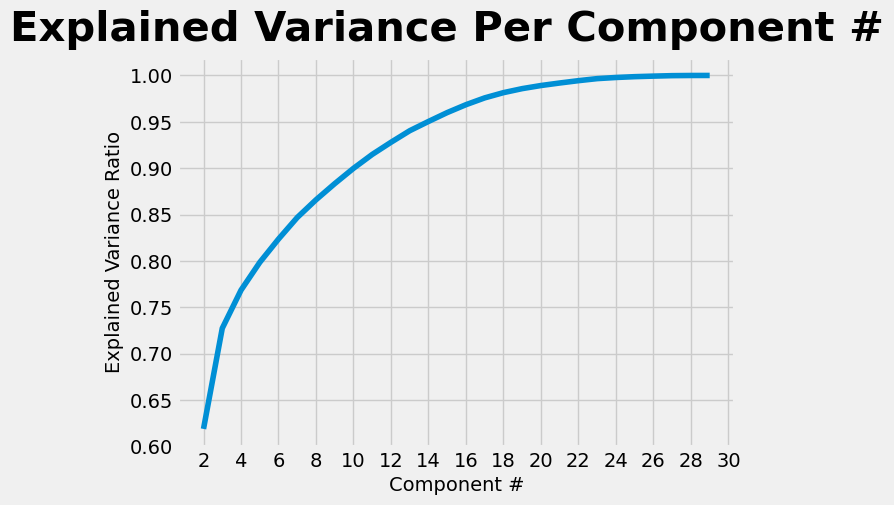

In [252]:
plt.style.use('fivethirtyeight')

pca_fig, ax = plt.subplots()

ax.plot(range(2, 30), pca_list)

ax.set_xlabel('Component #')
ax.set_ylabel('Explained Variance Ratio')

ax.set_xticks(np.arange(2, 31, 2.0))

pca_fig.suptitle("Explained Variance Per Component #", weight = 'bold', size = 30)

In [253]:
from numpy import diff

dx = 1
y = pca_list
dy = diff(y)/dx
print(dy)

[1.08466419e-01 4.11161521e-02 2.99660580e-02 2.51643328e-02
 2.32406422e-02 1.90728235e-02 1.74427808e-02 1.64923633e-02
 1.49916274e-02 1.30918156e-02 1.24815180e-02 9.96801647e-03
 9.58504002e-03 8.50588489e-03 7.34634202e-03 5.63281899e-03
 4.34036566e-03 3.34428003e-03 2.72428065e-03 2.51297021e-03
 2.20274160e-03 1.22919522e-03 8.76631291e-04 5.94648308e-04
 5.02475111e-04 1.78099621e-04 3.22871179e-05]


Text(0.5, 0.98, 'Components Rate of Change')

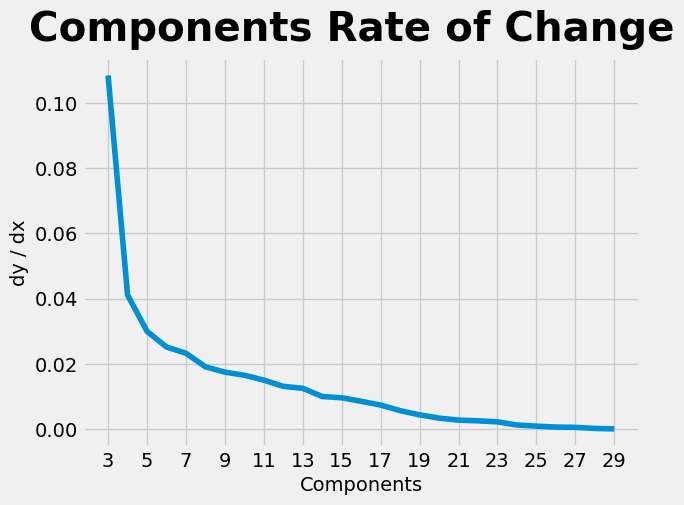

In [254]:
pca_deriv, ax = plt.subplots()

ax.plot(range(3, 30), dy)

ax.set_xlabel('Components')
ax.set_ylabel('dy / dx')

ax.set_xticks(np.arange(3, 31, 2.0))

pca_deriv.suptitle("Components Rate of Change", weight = 'bold', size = 29)

In [255]:
pca = PCA(n_components = 7)

components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 
                                                   'PC 7'])

pca_df['Player'] = combined_df_clean2['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7']]
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,A.J. Brown,11.001490,2.682913,2.302721,-0.644390,0.008864,0.122810,0.490589
1,Justin Jefferson,13.308431,-0.541905,-2.102662,-1.445825,0.973897,-0.383607,-1.189447
2,Tyler Lockett,2.644486,-0.134532,-3.980626,-2.636616,2.105479,0.496663,0.992779
3,Stefon Diggs,9.573382,-0.078625,-2.691676,-1.985789,1.012911,0.800298,0.264108
4,Diontae Johnson,2.716149,-3.726494,-3.000955,2.345310,-0.505278,0.888316,1.221864


In [256]:
#See how much each PC is adding weight(reduced from 10 to 7)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.49365388 0.1252236  0.10846642 0.04111615 0.02996606 0.02516433
 0.02324064]
0.846831076140454


In [257]:
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore", category=UserWarning)

x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'], 
                     pca_df['PC 6'], pca_df['PC 7']))

silhouette = []

os.environ['OMP_NUM_THREADS'] = '1'

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=99, n_init=10)
    cluster_labels = kmeans.fit_predict(x)

    centers = kmeans.cluster_centers_
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.35445075559306727
For n_clusters = 3, silhouette score is 0.22527385410089307
For n_clusters = 4, silhouette score is 0.1917365757354119
For n_clusters = 5, silhouette score is 0.18275831609463225
For n_clusters = 6, silhouette score is 0.18193828373562498
For n_clusters = 7, silhouette score is 0.18849341567983785
For n_clusters = 8, silhouette score is 0.17784777794158024
For n_clusters = 9, silhouette score is 0.17726535347648678
For n_clusters = 10, silhouette score is 0.17247234134840314
For n_clusters = 11, silhouette score is 0.18251073267344922
For n_clusters = 12, silhouette score is 0.17368336542490367
For n_clusters = 13, silhouette score is 0.1678588328828338
For n_clusters = 14, silhouette score is 0.16061175844474843
For n_clusters = 15, silhouette score is 0.1614963961799782
For n_clusters = 16, silhouette score is 0.16634656063552639
For n_clusters = 17, silhouette score is 0.15841458783249032
For n_clusters = 18, silhouette sco

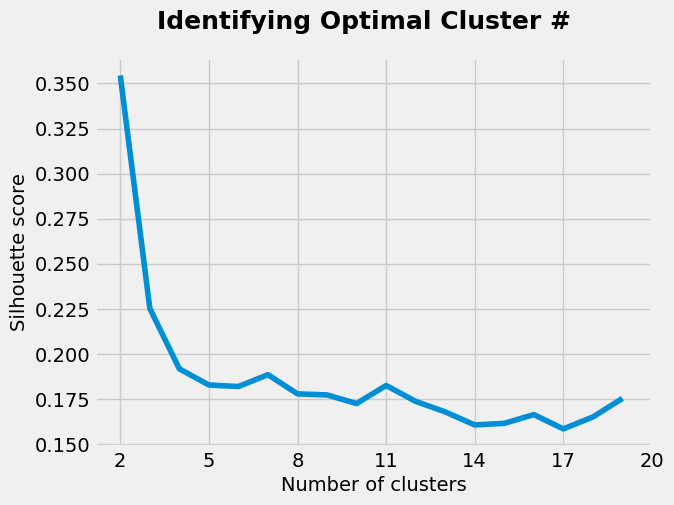

In [258]:
#Looking for best number of clusters to break up the players in to better analyze
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 20), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 21, 3.0))

silhouette_fig.suptitle("Identifying Optimal Cluster #", weight = 'bold', size = 18)

silhouette_fig.savefig('silhouette-score.png', dpi = 400, bbox_inches = 'tight')

In [259]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.2001038690872441
For n_cluster = 4, percent improvement = -0.043289204247211055
For n_cluster = 5, percent improvement = -0.011108086016571539
For n_cluster = 6, percent improvement = -0.0010034147488520162
For n_cluster = 7, percent improvement = 0.00801300417057349
For n_cluster = 8, percent improvement = -0.01311836273907252
For n_cluster = 9, percent improvement = -0.0007084143902638118
For n_cluster = 10, percent improvement = -0.005825708384029404
For n_cluster = 11, percent improvement = 0.012130581038708677
For n_cluster = 12, percent improvement = -0.010798144515601793
For n_cluster = 13, percent improvement = -0.0070487901348676996
For n_cluster = 14, percent improvement = -0.008708948342493139
For n_cluster = 15, percent improvement = 0.0010539077049622758
For n_cluster = 16, percent improvement = 0.005784309612328342
For n_cluster = 17, percent improvement = -0.009514712503414957
For n_cluster = 18, percent improvement = 0.0078861

Text(0.5, 0.98, 'Identifying Optimal Cluster #')

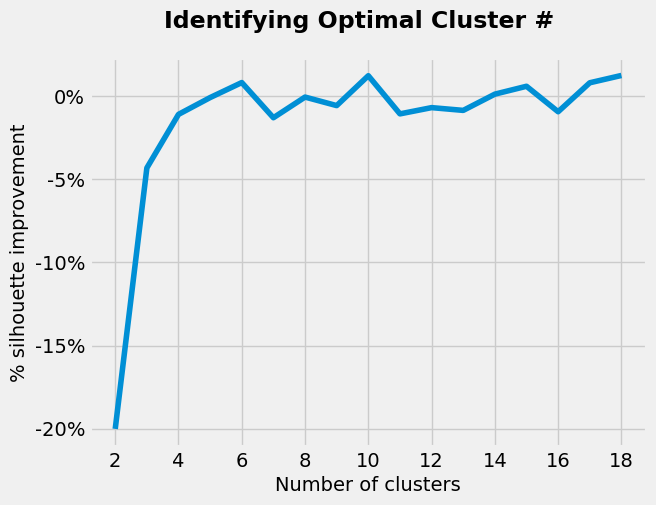

In [260]:
plt.style.use('fivethirtyeight')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(2, 19), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(2, 19, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Identifying Optimal Cluster #", weight = 'bold', size = 17)

In [261]:
import pickle
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1, n_init=10)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

with open("clusterModel.sav", "wb") as myfile:
    pickle.dump(kmeans, myfile)




In [262]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = combined_df_clean2['Player']
df_cluster['Cluster'] = y_kmeans

pd.DataFrame.to_excel(df_cluster, "playerCluster2022_2021.xlsx")
df_cluster.head(20)

,Player,Cluster
0,A.J. Brown,9
1,Justin Jefferson,9
2,Tyler Lockett,3
3,Stefon Diggs,9
4,Diontae Johnson,1
5,Chris Olave,7
6,Brandon Aiyuk,1
7,Tee Higgins,7
8,Tyreek Hill,9
9,CeeDee Lamb,1
